## Código Exemplo

Link para referência: https://www.kaggle.com/code/medghaithzinine/handsignlanguage-using-cnn#1-DATA-AUGMENTATION

In [1]:
pip install -U matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
train_dir="./data/Train"
test_dir="./data/Test"

In [10]:
train_datagen=ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
#defining the test data 
test_datagen=ImageDataGenerator(
    rescale=1./255.
)
#generating my train data 
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(28,28),
    batch_size=32,
    class_mode='categorical'
)
#generating my validation data 
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')  # 24 classes: A-Y excluding J and Z
])

In [13]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(train_generator,epochs=10,batch_size=32,validation_data=validation_generator,verbose=1)

Epoch 1/10


/home/mitsogad/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.2203 - loss: 2.5008 - val_accuracy: 0.6740 - val_loss: 0.8991
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7394 - loss: 0.7379 - val_accuracy: 0.8298 - val_loss: 0.4756
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8843 - loss: 0.3433 - val_accuracy: 0.8861 - val_loss: 0.3384
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9319 - loss: 0.1961 - val_accuracy: 0.9175 - val_loss: 0.2951
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9552 - loss: 0.1289 - val_accuracy: 0.9025 - val_loss: 0.3139
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9706 - loss: 0.0887 - val_accuracy: 0.8840 - val_loss: 0.3752
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9734 - loss: 0.0819 - val_accuracy: 0.9156 - val_loss: 0.3177
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9802 - loss: 0.0617 - val_accurac

In [17]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9140 - loss: 0.3550
Test loss: 0.3579098582267761
Test accuracy: 0.9113218188285828


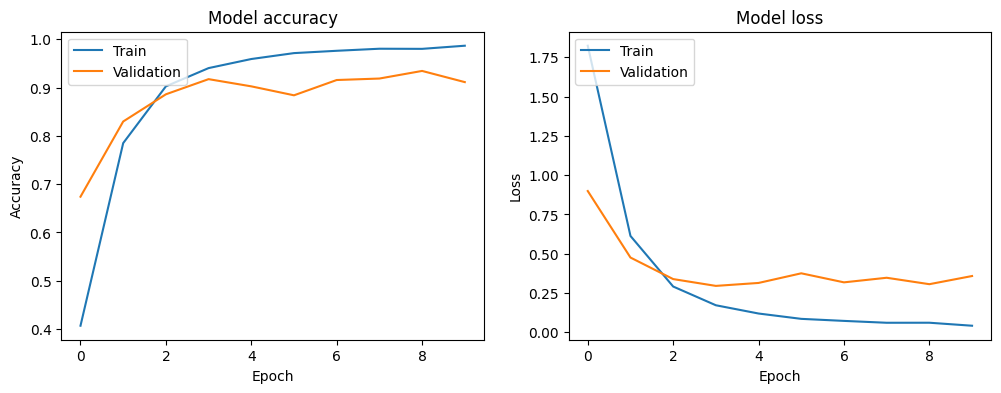

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [19]:
predict=model.predict(test_generator)
y_hat=np.argmax(predict,axis=1)
print(y_hat)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[ 4  7 18 ... 11  8 23]


In [21]:
from tensorflow.keras.preprocessing import image

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(28, 28,3)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Load a single image from the test directory
img_path = './data/Test/E/15_E.jpg'  
img_array = load_and_preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)

# Map the predicted class index to the corresponding class label
class_labels =list(test_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'Predicted class:{predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted class:E
